# Homework Data Visualization

- Nama: Raissa Liusty
- Cita-cita semasa kecil: President

Dataset:
[https://www.kaggle.com/blastchar/telco-customer-churn#WA_Fn-UseC_-Telco-Customer-Churn.csv

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# please import as much as you need

In [2]:
# read your data

df = pd.read_csv('telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Normal

## 1. Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

<Axes: xlabel='PaymentMethod'>

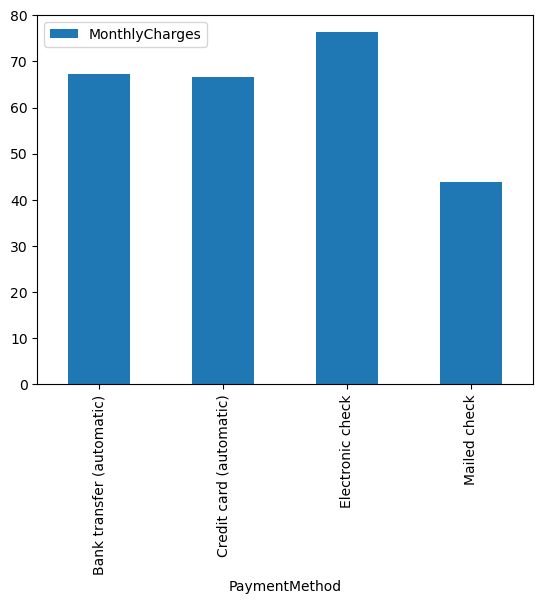

In [3]:
df2=df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()
# mungkin ini bisa diganti dari variable df2 menjadi variable average_monthly_charge, 
#usahakan penamaan variabel mewakili saat sedang melakukan sesuatu
df2.plot(x='PaymentMethod',y='MonthlyCharges',kind='bar')

In [4]:
# Menghitung rata-rata monthly charge per customer untuk setiap payment method
average_monthly_charge = df.groupby('PaymentMethod')['MonthlyCharges'].mean()

# Mengidentifikasi payment method dengan rata-rata monthly charge terbesar
payment_method_max_charge = average_monthly_charge.idxmax()
max_charge = average_monthly_charge.max()

# Menampilkan hasil
print("Payment method dengan monthly charge terbesar per customernya adalah:", payment_method_max_charge)
print("Rata-rata monthly charge terbesar:", max_charge)

Payment method dengan monthly charge terbesar per customernya adalah: Electronic check
Rata-rata monthly charge terbesar: 76.25581395348837


<Axes: xlabel='PaymentMethod'>

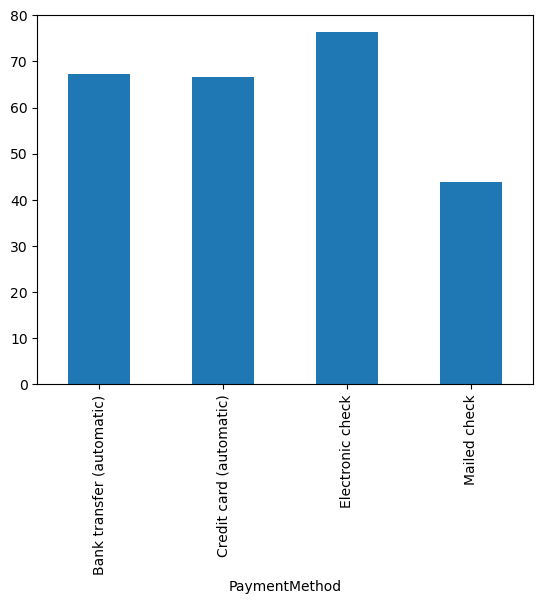

In [7]:
average_monthly_charge.plot(x='PaymentMethod',y='MonthlyCharges',kind='bar')

Jadi, dari plot di atas, dapat disimpulkan bahwa payment electronic check lah yang memiliki hasil tertinggi, dan yang terendah adalah mailed check

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## 2. Bagaimana jumlah customer dilihat dari tenure group?
### Lebih baik menggunakan df['tenure'].max() dari pada 100, barang kali ternyata ada case baru yang tenurnya melebihi 100 hari. Tetapi, biasanya diberi tahu jika ada case baru lagi yang melebihi 100 hari.

Tenure group:
- low_tenure: User dengan tenure < 21 hari
- medium_tenure: User dengan tenure 21 - 40 hari
- high_tenure: User dengan tenure > 40 hari

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [4]:
# your code goes here!
import numpy as np
#apakah batas pada list[3] = 100 merupakan batas yang paling atas?
batas=[0,21,40,100]
# jadi sebaiknya mengubah 100 menjadi dataset['tenure'].max()
kategori=['low_tenure','medium_tenure','high_tenure']
df['tenure_group']=pd.cut(df['tenure'],bins=batas,labels=kategori)

#np.where(consumption_energy > 400, 'high', (np.where(consumption_energy < 200, 'low', 'medium')))

In [10]:
# Menentukan rentang grup tenure
bins = [0, 20, 40, df['tenure'].max()]
labels = ['low_tenure', 'medium_tenure', 'high_tenure']

# Menambahkan kolom baru 'TenureGroup' ke dalam dataset berdasarkan rentang grup tenure
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

# Menghitung jumlah customer unik dalam setiap grup tenure
customer_count = df.groupby('TenureGroup')['customerID'].nunique()

# Menampilkan hasil
print(customer_count)

TenureGroup
low_tenure       2807
medium_tenure    1415
high_tenure      2459
Name: customerID, dtype: int64


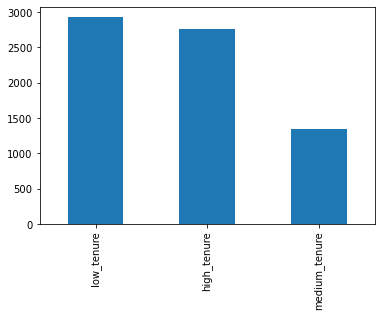

In [5]:
pd.value_counts(df['tenure_group']).plot.bar()

Jadi, dari plot di atas, kami menyimpulkan bahwa nilai tertinggi adalah user dengan tenure low, dan yang paling rendah adalah user dengan tenure medium

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## 3. Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?
### (ada yang salah dari kesimpulan yang dibuat)

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



<Axes: xlabel='SeniorCitizen', ylabel='count'>

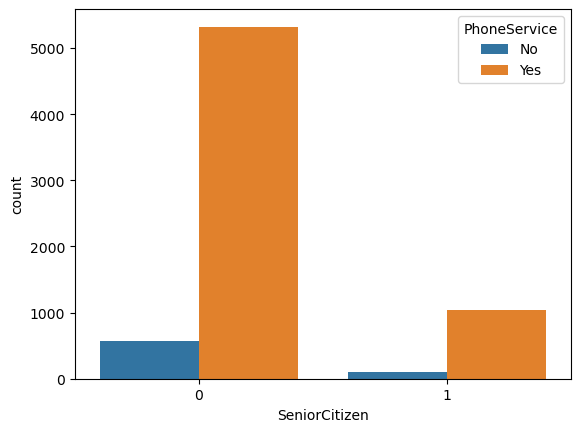

In [11]:
sns.countplot(x='SeniorCitizen',data=df,hue='PhoneService')

### Perbaikan

In [46]:
# Menghitung jumlah unique customer Senior Citizen yang berlangganan dan tidak berlangganan PhoneService
senior_citizen_counts = df.loc[df['SeniorCitizen'] == 1, 'PhoneService'].value_counts()

# Menghitung jumlah unique customer Not Senior Citizen yang berlangganan dan tidak berlangganan PhoneService
not_senior_citizen_counts = df.loc[df['SeniorCitizen'] == 0, 'PhoneService'].value_counts()

# Menampilkan informasi jumlah unique customer Senior Citizen yang berlangganan dan tidak berlangganan PhoneService
print("Jumlah unique customer Senior Citizen yang berlangganan PhoneService:", senior_citizen_counts[1])
print("Jumlah unique customer Senior Citizen yang tidak berlangganan PhoneService:", senior_citizen_counts[0])
print("Jumlah unique customer bukan Senior Citizen yang berlangganan PhoneService:", not_senior_citizen_counts[1])
print("Jumlah unique customer bukan Senior Citizen yang tidak berlangganan PhoneService:", not_senior_citizen_counts[0])

Jumlah unique customer Senior Citizen yang berlangganan PhoneService: 104
Jumlah unique customer Senior Citizen yang tidak berlangganan PhoneService: 1038
Jumlah unique customer bukan Senior Citizen yang berlangganan PhoneService: 578
Jumlah unique customer bukan Senior Citizen yang tidak berlangganan PhoneService: 5323


In [47]:
jml_row = df.shape[0]


In [48]:
senior_citizen_counts_yes_phoneservice = "{:.2f}".format(senior_citizen_counts[1]/jml_row*100)
senior_citizen_counts_no_phoneservice = "{:.2f}".format(senior_citizen_counts[0]/jml_row*100)

In [53]:
# jika ingin di percent
print("Percent customer Senior Citizen yang berlangganan PhoneService:", senior_citizen_counts_yes_phoneservice, "%")
print("Percent customer Senior Citizen yang tidak berlangganan PhoneService:", senior_citizen_counts_no_phoneservice,"%")

Percent customer Senior Citizen yang berlangganan PhoneService: 1.48 %
Percent customer Senior Citizen yang tidak berlangganan PhoneService: 14.74 %


In [54]:
not_senior_citizen_counts_yes_phoneservice = "{:.2f}".format(not_senior_citizen_counts[1]/jml_row*100)
not_senior_citizen_counts_no_phoneservice = "{:.2f}".format(not_senior_citizen_counts[0]/jml_row*100)

In [56]:
print("Percent customer bukan Senior Citizen yang berlangganan PhoneService:", not_senior_citizen_counts_yes_phoneservice, "%")
print("Percent customer bukan Senior Citizen yang tidak berlangganan PhoneService:", not_senior_citizen_counts_no_phoneservice, "%")

Percent customer bukan Senior Citizen yang berlangganan PhoneService: 8.21 %
Percent customer bukan Senior Citizen yang tidak berlangganan PhoneService: 75.58 %


Jadi, dari plot di atas, dapat disimpulkan bahwa baik senior citizen ataupun bukan sebagian besar berlangganan phone service<br>
Dan kita bisa dikatakan, Mayoritas pengguna Phoneservice ini adalah bukan Senior Citizen

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## 4. Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [12]:
df['TotalCharges']=df['TotalCharges'].astype(float)
sns.displot(x='TotalCharges',data=df)

ValueError: could not convert string to float: ' '

Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## 5. Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

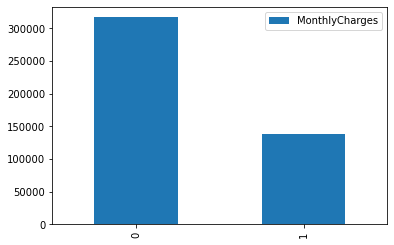

In [8]:
dfgroup = df.groupby(['Churn'])['MonthlyCharges'].sum().reset_index()
dfgroup.plot.bar()

Jadi, dari plot di atas, dapat disimpulkan bahwa dari visualisasi diatas bisa dilihatt bahwa monthly charge yang tinggi tidak cenderung churn, namun monthly charge yang rendah lah yang membuat churn

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## 6. Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

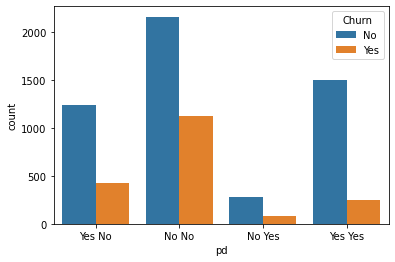

In [9]:
df['pd'] = df['Partner'] +' '+ df['Dependents']
sns.countplot(x='pd',data=df,hue='Churn')

Jadi, dari plot di atas, dapat disimpulkan bahwa untuk kategori manapun tingkat untuk tidak churn selalu lebih tinggi dibandingkan yang churn, sehingga menurut saya partner dan dependent tidak terlalu mempengaruhi

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## 7. Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [13]:
dfg = df.groupby(['PaymentMethod','Churn'])['customerID'].count().reset_index()
dfg

,PaymentMethod,Churn,customerID
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


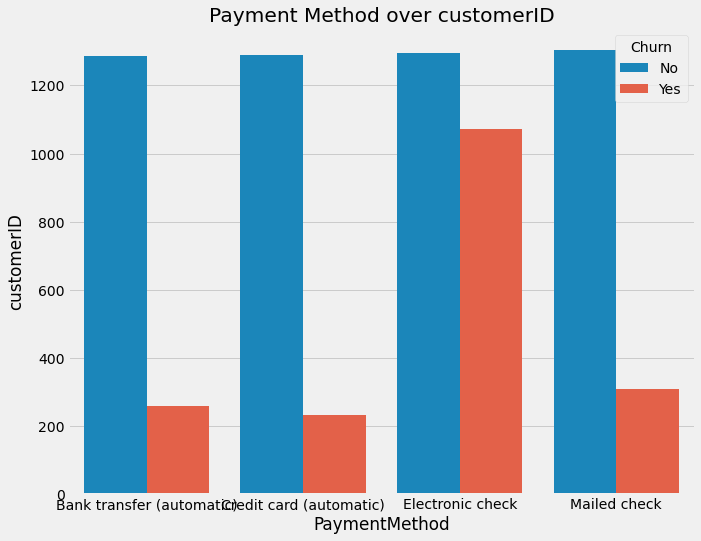

In [38]:
import matplotlib.style as style
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
style.use('fivethirtyeight')
plt.title('Payment Method over customerID')
grap=sns.barplot(x='PaymentMethod',y='customerID',data=dfg,hue='Churn')
ticks_loc = grap.get_yticks().tolist()
grap.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))



dari visualisai tersebut bisa dilihat bahwa setiap payment method memiliki tingat churn no yang sangat jauh dibandingkan tingkat churn yes kecuali untuk metode electronic check